In [3]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid') # sns에 흰색 그리드 유지
import missingno # 결측치 시각화

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝 알고리즘 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 원핫 인코더
from keras.utils import to_categorical

# 학습 자동 중단
from keras.callbacks import EarlyStopping

# 모델 저장
from keras.callbacks import ModelCheckpoint

# 저장된 딥러닝 모델 불러오기
from keras.models import load_model

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

# 자연어 처리
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 10                 # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

# gpu 사용 초기화 및 할당
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [4]:
# imdb 데이터 사용
from keras.datasets import imdb

In [5]:
# seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [7]:
# 데이터를 가져온다.
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 1s 0us/step


In [10]:
# 입력데이터 전처리
# 각 문장의 단어수를 통일한다. 부족한 부분은 0으로 채운다.

X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)

In [11]:
# 모델 설정
model = Sequential()

# 5000개의 단어를 100개로 변환하는 은닉층
model.add(Embedding(5000,100))
# 노드 on/off
model.add(Dropout(0.5))
# CNN
# 5개짜리 커널을 64개 생성
model.add(Conv1D(64, 5, padding='valid', activation = 'relu',strides=1))
# 데이터 압축
model.add(MaxPooling1D(pool_size=4))
# RNN
# 기사당 단어 수
model.add(LSTM(55))
# 출력층 셋틍
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [14]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# 모델 실행
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=5)

Epoch 1/5
250/250 [==============================] - 40s 140ms/step - loss: 0.5422 - accuracy: 0.6867 - val_loss: 0.3062 - val_accuracy: 0.8714
Epoch 2/5
250/250 [==============================] - 35s 139ms/step - loss: 0.2449 - accuracy: 0.9069 - val_loss: 0.3031 - val_accuracy: 0.8713
Epoch 3/5
250/250 [==============================] - 35s 140ms/step - loss: 0.1995 - accuracy: 0.9236 - val_loss: 0.2889 - val_accuracy: 0.8812
Epoch 4/5
250/250 [==============================] - 35s 140ms/step - loss: 0.1626 - accuracy: 0.9391 - val_loss: 0.3080 - val_accuracy: 0.8787
Epoch 5/5
250/250 [==============================] - 35s 140ms/step - loss: 0.1509 - accuracy: 0.9466 - val_loss: 0.3153 - val_accuracy: 0.8758


In [16]:
# 검증용 데이터를 통해 확인을 한다.
model.evaluate(X_test, y_test)[1]

782/782 [==============================] - 14s 18ms/step - loss: 0.3153 - accuracy: 0.8758


0.875760018825531

In [17]:
# 테스트 데이터의 오차 정보
y_vloss = history.history['val_loss']

# 학습셋의 오차정보
y_loss = history.history['loss']

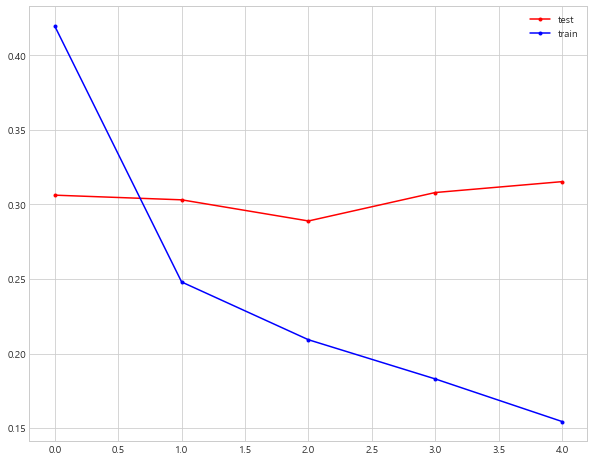

In [20]:
# 그래프
# 학습된 데이터는 오차가 떨어지지만 test데이터는 떨어지지않음을 알수 있음
# 학습횟수가 적어서 그럴 가능성이 있음

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, c='red', label='test', marker='.')
plt.plot(x_len, y_loss, c='blue', label='train', marker='.')

plt.legend()
plt.show()